<a href="https://colab.research.google.com/github/daiduong101202/AI--ChieuT6/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
     

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [6]:
trainset='/content/drive/MyDrive/Food'

In [7]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 984 images belonging to 10 classes.
Found 103 images belonging to 10 classes.


In [8]:
{'.ipynb_checkpoints': 0,
 'dau phong': 1,
 'che buoi': 2,
 'bun dau mam tom': 3,
 'bun bo': 4,
 'banh xeo': 5,
 'banh uot': 6,
 'banh mi': 7,
 'banh loc': 8,
 'banh it': 9,
 'banh chung': 10}

{'.ipynb_checkpoints': 0,
 'dau phong': 1,
 'che buoi': 2,
 'bun dau mam tom': 3,
 'bun bo': 4,
 'banh xeo': 5,
 'banh uot': 6,
 'banh mi': 7,
 'banh loc': 8,
 'banh it': 9,
 'banh chung': 10}

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
8/8 [==============================] - 384s 46s/step - loss: 4.3300 - accuracy: 0.0955 - val_loss: 2.2946 - val_accuracy: 0.0971
Epoch 2/50
8/8 [==============================] - 137s 17s/step - loss: 2.2730 - accuracy: 0.1260 - val_loss: 2.1801 - val_accuracy: 0.2136
Epoch 3/50
8/8 [==============================] - 139s 17s/step - loss: 2.2182 - accuracy: 0.1697 - val_loss: 1.9906 - val_accuracy: 0.4369
Epoch 4/50
8/8 [==============================] - 131s 16s/step - loss: 2.0093 - accuracy: 0.2561 - val_loss: 2.7419 - val_accuracy: 0.1845
Epoch 5/50
8/8 [==============================] - 134s 16s/step - loss: 1.7168 - accuracy: 0.4045 - val_loss: 1.1655 - val_accuracy: 0.6019
Epoch 6/50
8/8 [==============================] - 132s 16s/step - loss: 1.5386 - accuracy: 0.5274 - val_loss: 1.5587 - val_accuracy: 0.5534
Epoch 7/50
8/8 [==============================] - 132s 16s/step - loss: 1.0580 - accuracy: 0.6565 - val_loss: 0.3924 - val_accuracy: 0.8544
Epoch 8/50
8/8 [====

In [11]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 984 images belonging to 10 classes.
Found 103 images belonging to 10 classes.


In [12]:
model.save('monan13.hs')

In [13]:
model1=load_model('monan13.hs')

In [32]:
label = ['banh chung','banh it','banh loc','banh mi','banh uot ','banh xeo','bun bo','bun dau mam tom','che buoi','dau phong']


1/1 [==============================] - 0s 91ms/step
banh loc


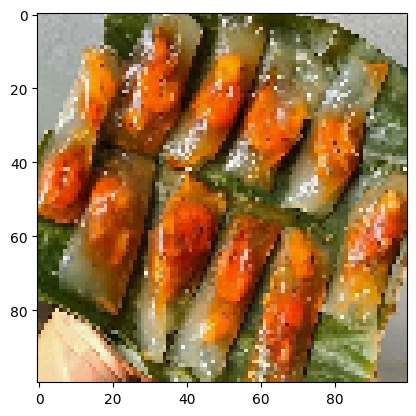

In [29]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Food/banh-bot-loc-da-nang-1.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 119ms/step
bun dau mam tom


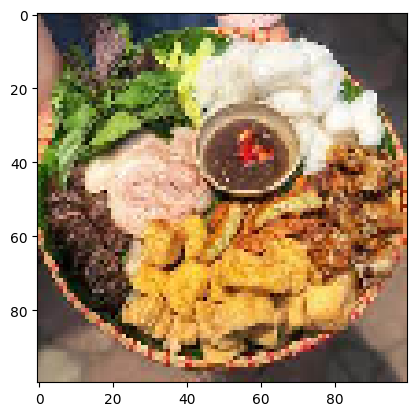

In [30]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Food/bundau_test.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 55ms/step
banh it


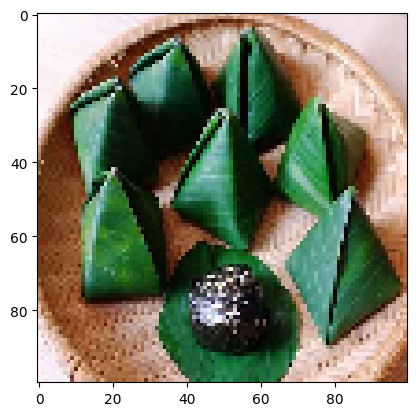

In [33]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Food/banh_it_test.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])